## Part1.Exploratory Data Analysis for restaurant experience in Bengaluru &
## Part2. Restaurant Recommender System Implementation in Python 


**By-Deepa Kushwaha**

### Part 1:EDA for restaurant experience
### Loading Packages

In [351]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

#Imports required for Plotly
import plotly.graph_objs as go
import plotly.offline as py
import plotly.figure_factory as ff
from plotly import tools

## Reading dataset

In [352]:
df=pd.read_csv("restoinfo.csv",encoding='latin-1')
df.head()

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,46019,Unique Brew Cafe Resto,No,No,NaN,0,Indiranagar,Quick Bites,NaN,Fast Food,200,[],[],Dine-out,Old Airport Road
1,28849,Jayanthi Sagar,No,No,3.1 /5,21,Koramangala 5th Block,Quick Bites,NaN,"South Indian, North Indian, Chinese",200,"[('Rated 2.0', ""RATEDn Works only because it'...",[],Dine-out,Koramangala 4th Block
2,19855,Rock Stone Ice Cream Factory,Yes,No,4.0/5,131,BTM,Dessert Parlor,"Icecream Cake, Brownie, Waffles, Chocolate Ice...",Ice Cream,230,"[('Rated 4.0', ""RATEDn Ice creams are really ...","['Midnight Indulgence Cake', 'Butterscotch Mel...",Delivery,Jayanagar
3,35188,Punjabi by Nature 2.0,No,No,4.2 /5,3236,BTM,"Casual Dining, Microbrewery","Paneer Tikki, Mutton Raan, Mango Margarita, Cr...",North Indian,NaN,"[('Rated 3.0', ""RATEDn It has a beautiful amb...",[],Delivery,Koramangala 7th Block
4,7070,Rayalaseema Chefs,Yes,Yes,3.9/5,225,Marathahalli,Casual Dining,"Bamboo Chicken, Butter Naan, Mutton Biryani, P...","North Indian, Biryani, Andhra, Chinese",800,"[('Rated 5.0', 'RATEDn Had Good experience wi...",[],Delivery,Brookefield


In [353]:
df.shape

(2069, 15)

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   2069 non-null   int64 
 1   name                         2069 non-null   object
 2   online_order                 2069 non-null   object
 3   book_table                   2069 non-null   object
 4   rate                         1770 non-null   object
 5   votes                        2069 non-null   int64 
 6   location                     2069 non-null   object
 7   rest_type                    2052 non-null   object
 8   dish_liked                   962 non-null    object
 9   cuisines                     2069 non-null   object
 10  approx_cost(for two people)  2053 non-null   object
 11  reviews_list                 2069 non-null   object
 12  menu_item                    2069 non-null   object
 13  listed_in(type)              2069

In [355]:
df.duplicated().sum()

0

# Data pre-processing

__Potting the graph for missing values status__

,Total,Percent
dish_liked,1107,0.535041
rate,299,0.144514
rest_type,17,0.008217
approx_cost(for two people),16,0.007733
listed_in(city),0,0.000000


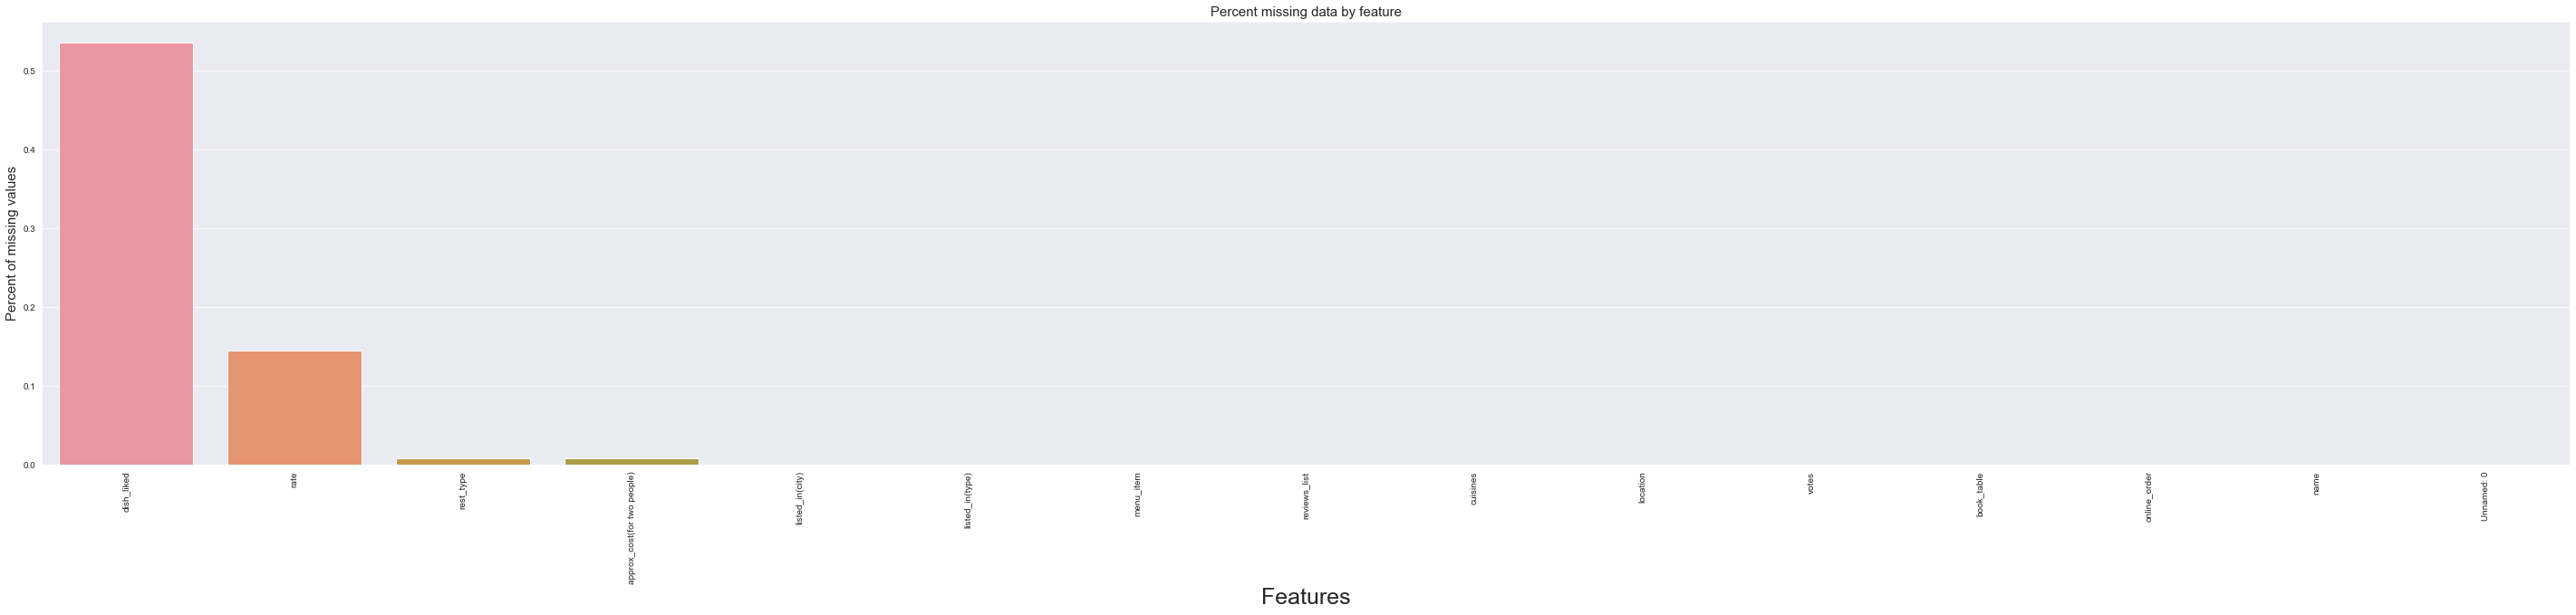

In [356]:
# their is null values present
#function to get missing values in %
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(50, 9))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=25)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

 __From above, it is found that the column "dish_liked" has more than 50% values missing__

__Dropping the column "dish_liked" and saving the data_recom_rating dataset as "df" both are not necessary so we can drop this column__

In [357]:
df=df.drop(['dish_liked'],axis=1)
df.columns

Index(['Unnamed: 0', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

__Renaming "approx_cost(for two people)" ,listed_in(type) and listed_in(city) as they have multiple data-types__

In [358]:
df.rename({'approx_cost(for two people)': 'approx_cost_for_2_ppl',
               'listed_in(type)':'listed_in_type',
               'listed_in(city)':'listed_in_city','Unnamed: 0': "Id"
              }, axis=1, inplace=True)
df.columns

Index(['Id', 'name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost_for_2_ppl', 'reviews_list',
       'menu_item', 'listed_in_type', 'listed_in_city'],
      dtype='object')

__Converting "votes" and  "approx_cost_for_2_people" into numeric(int)__

__"votes" and  "approx_cost_for_2_people" have values like 1,000. 
So we will change them into pure numeric values.
<br>For this, we will use the lambda function__

In [359]:
remove_comma = lambda x: int(x.replace(',', '')) if type(x) == np.str and x != np.nan else x 
df.votes = df.votes.astype('int')
df['approx_cost_for_2_ppl'] = df['approx_cost_for_2_ppl'].apply(remove_comma)

__Confirming the data-types of "votes" and "approx_cost_for_2_people"__

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     2069 non-null   int64  
 1   name                   2069 non-null   object 
 2   online_order           2069 non-null   object 
 3   book_table             2069 non-null   object 
 4   rate                   1770 non-null   object 
 5   votes                  2069 non-null   int32  
 6   location               2069 non-null   object 
 7   rest_type              2052 non-null   object 
 8   cuisines               2069 non-null   object 
 9   approx_cost_for_2_ppl  2053 non-null   float64
 10  reviews_list           2069 non-null   object 
 11  menu_item              2069 non-null   object 
 12  listed_in_type         2069 non-null   object 
 13  listed_in_city         2069 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(11)
memory usa

__Now we will convert "rate" into float__

__Checking unique values of "rate"__

In [361]:
df['rate'].unique()

array([nan, '3.1 /5', '4.0/5', '4.2 /5', '3.9/5', '4.1 /5', '3.3/5',
       '4.4/5', '3.8/5', '3.1/5', '3.5/5', '3.8 /5', '2.9/5', '4.1/5',
       '3.7/5', '3.5 /5', '3.4 /5', '3.7 /5', '4.5/5', '4.3 /5', '3.6/5',
       '2.8 /5', '3.2/5', '4.0 /5', '2.9 /5', '3.0 /5', '4.4 /5',
       '3.2 /5', '4.6 /5', 'NEW', '3.9 /5', '3.0/5', '4.8 /5', '3.6 /5',
       '3.3 /5', '4.5 /5', '2.8/5', '3.4/5', '4.2/5', '2.1/5', '4.9 /5',
       '4.3/5', '2.7/5', '2.6/5', '2.7 /5', '2.2/5', '2.4/5', '2.5 /5',
       '2.1 /5', '1.8 /5', '2.6 /5', '4.7 /5', '-', '2.3/5', '4.6/5',
       '2.2 /5'], dtype=object)

__We remove the restaurent datas which has rate='data_recom_rating'__

In [362]:
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)

__Now we will remove '/5'__

In [363]:
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')

In [364]:
df['rate'].unique()

array([nan, 3.1, 4. , 4.2, 3.9, 4.1, 3.3, 4.4, 3.8, 3.5, 2.9, 3.7, 3.4,
       4.5, 4.3, 3.6, 2.8, 3.2, 3. , 4.6, 4.8, 2.1, 4.9, 2.7, 2.6, 2.2,
       2.4, 2.5, 1.8, 4.7, 2.3])

__Now we see that 'rate' column has converted to float datatype__

# Exploratory Data Analysis(EDA)

__Top restaurant__

Text(0, 0.5, 'Name of Restaurants')

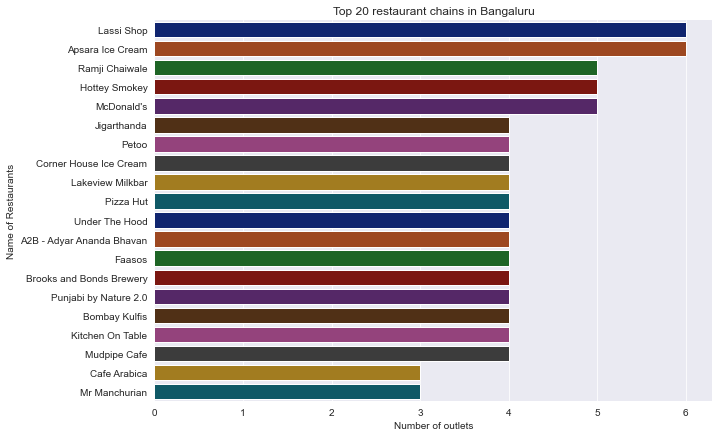

In [365]:
plt.figure(figsize=(10, 7))
sns.set_style('darkgrid')
chains= df['name'].value_counts()[:20]
#online= df['']
sns.barplot(x= chains, y = chains.index, palette= 'dark')
sns.despine()
plt.title('Top 20 restaurant chains in Bangaluru')
plt.xlabel('Number of outlets')
plt.ylabel('Name of Restaurants')


We can see that :

- Lassi Shop has the most number of outlets in the city of bangaluru.
- Mr Machurian is on the 20th number according to number of outlets

__MOST COMMON RESTAURANT TYPES IN BANGULURU__

Text(0, 0.5, 'Restaurant type')

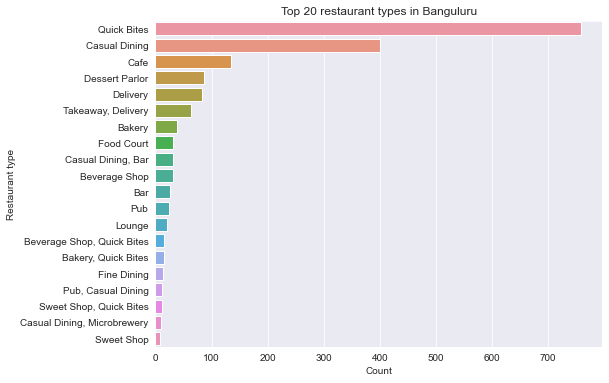

In [366]:
rest_type= df['rest_type'].value_counts()[:20]
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.barplot(x= rest_type, y = rest_type.index)
plt.title('Top 20 restaurant types in Banguluru')
plt.xlabel('Count')
plt.ylabel('Restaurant type')

We can see that :

1. BANGULURU being a busy city, most common type of restaurants are Quick Bites restaurants.
2. Casual Dining is less popular.  

__Rating Distribution__

Text(0.5, 0, 'Ratings')

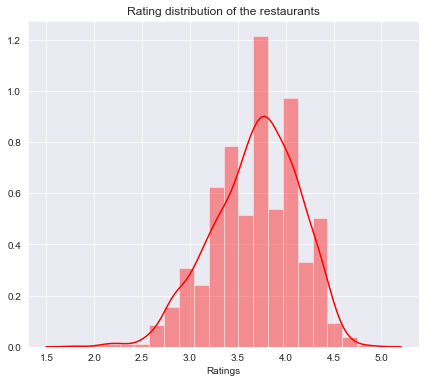

In [367]:
rating= df['rate']
plt.figure(figsize=(7,6))
sns.set_style('darkgrid')
sns.distplot(rating, bins = 20,  color= 'red')
plt.title('Rating distribution of the restaurants')
plt.xlabel('Ratings')

We can see that :

1. Maximum restaurants have ratings between 3 and 4.
2. Restaurants with rating higher than 4.5 are very rare.

__Cost Distribution for two people__

Text(0.5, 0, 'Cost for two people')

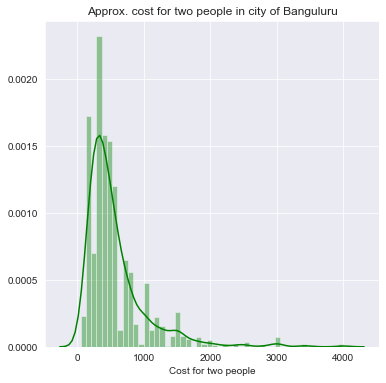

In [368]:
cost= df['approx_cost_for_2_ppl']
plt.figure(figsize=(6,6))
sns.set_style('darkgrid')
sns.distplot(cost, color= 'green')
plt.title('Approx. cost for two people in city of Banguluru')
plt.xlabel('Cost for two people')

We can see that:

 - Maximum restaurants in banguluru cost less than INR 1000 for two people.

__Cost vs Rating__

Text(0, 0.5, 'Approx. cost for 2 people')

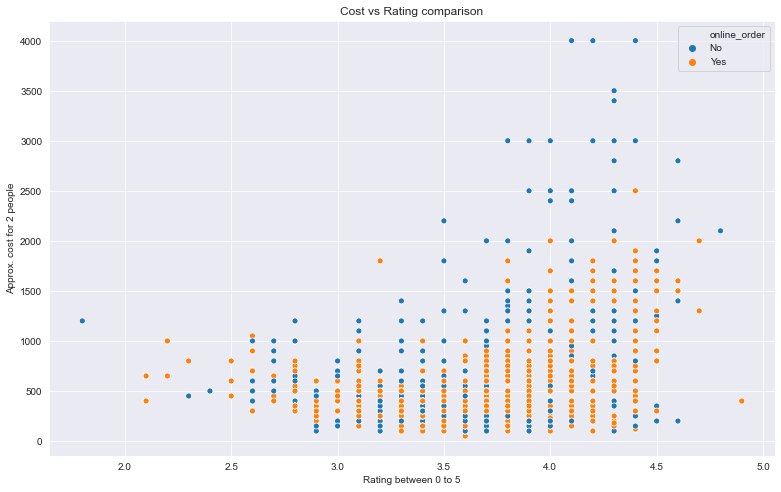

In [369]:
crdf= df[['rate', 'approx_cost_for_2_ppl', 'online_order']].dropna()
plt.figure(figsize=(13, 8))
sns.set_style('darkgrid')
sns.scatterplot( x= 'rate', y = 'approx_cost_for_2_ppl', hue= 'online_order', data= crdf )
plt.title('Cost vs Rating comparison')
plt.xlabel('Rating between 0 to 5')
plt.ylabel('Approx. cost for 2 people')

__Restaurants accept online orders__

In [370]:
x = df['online_order'].value_counts()
trace = go.Pie(labels = x.index, values = x)
layout = go.Layout(title = "Online Order")
fig = go.Figure(data=[trace], layout = layout)
py.iplot(fig, filename='pie_OnlineOrder')

__Advance booking of tables__

In [371]:
# advance booking of tables

x = df['book_table'].value_counts()
trace = go.Pie(labels = x.index, values = x)
layout = go.Layout(title = "Book Table")
fig = go.Figure(data=[trace], layout = layout)
py.iplot(fig, filename='pie_bookTable')

__Most famous areas in bangaluru for food lovers (Foodie Area)__

Text(0, 0.5, 'Location in city')

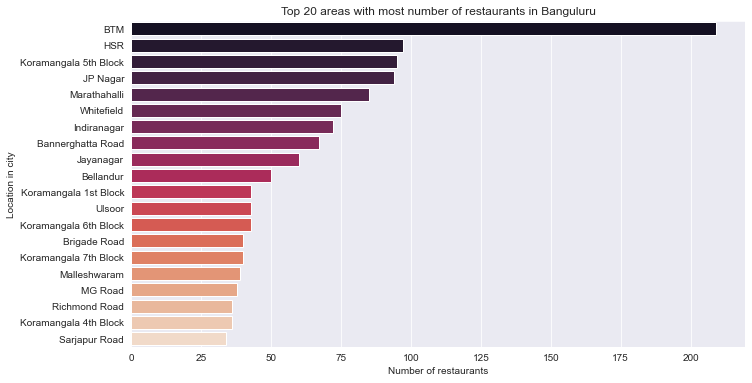

In [372]:
# MOST FAMOUS AREAS IN BANGULURU FOR FOOD LOVERS ( FOODIE AREAS )

areas= df['location'].value_counts()[:20]

plt.figure(figsize=(11, 6))
sns.set_style('darkgrid')
sns.barplot(x= areas, y= areas.index, palette='rocket')
plt.title('Top 20 areas with most number of restaurants in Banguluru')
plt.xlabel('Number of restaurants')
plt.ylabel('Location in city')


We can see that:

1. BTM, HSR, Koramangala 5th Block has the most number of restaurants.
2. BTM dominates by having more than 300 approx restaurants.
3. Sarjapur Road which is a very popular area in Banguluru has less than 25 approx restaurants.

__MOST FAMOUS CUISINES IN BANGULURU:__

Text(0, 0.5, 'Cuisines')

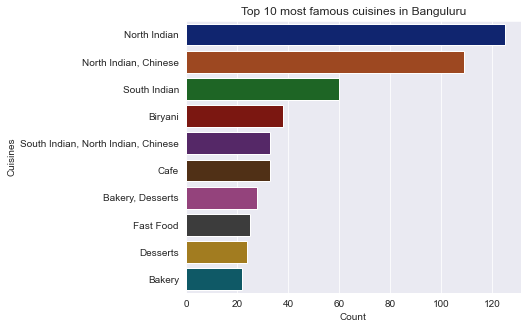

In [373]:
cuisines= df['cuisines'].value_counts()[:10]
plt.figure(figsize=(6,5))
sns.set_style('darkgrid')
sns.barplot(x= cuisines, y= cuisines.index, palette='dark')
plt.title('Top 10 most famous cuisines in Banguluru')
plt.xlabel('Count')
plt.ylabel('Cuisines')

We can see that :

- North Indian, South Indian, Chinese are very popular in Banguluru.

###########################################################################################################

## Part.2

# Building a recommendation system for top 3 restaurant

In [374]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.tokenize import word_tokenize

In [375]:
# Let's create dataframe for specific parameters(columns)
data = df[["name",'location',"cuisines","approx_cost_for_2_ppl",'rate',"votes"]].copy()

In [376]:
data.head()

,name,location,cuisines,approx_cost_for_2_ppl,rate,votes
0,Unique Brew Cafe Resto,Indiranagar,Fast Food,200.0,NaN,0
1,Jayanthi Sagar,Koramangala 5th Block,"South Indian, North Indian, Chinese",200.0,3.1,21
2,Rock Stone Ice Cream Factory,BTM,Ice Cream,230.0,4.0,131
3,Punjabi by Nature 2.0,BTM,North Indian,NaN,4.2,3236
4,Rayalaseema Chefs,Marathahalli,"North Indian, Biryani, Andhra, Chinese",800.0,3.9,225


In [377]:
data.info()  # data contains missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   1979 non-null   object 
 1   location               1979 non-null   object 
 2   cuisines               1979 non-null   object 
 3   approx_cost_for_2_ppl  1964 non-null   float64
 4   rate                   1680 non-null   float64
 5   votes                  1979 non-null   int32  
dtypes: float64(2), int32(1), object(3)
memory usage: 85.2+ KB


In [378]:
#avg cost in numeric form so we using median method remove nan
data['approx_cost_for_2_ppl'].fillna(data['approx_cost_for_2_ppl'].median(),inplace=True)
data["rate"]=data.rate.fillna(0)

In [379]:
data.info()  #not null values any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   1979 non-null   object 
 1   location               1979 non-null   object 
 2   cuisines               1979 non-null   object 
 3   approx_cost_for_2_ppl  1979 non-null   float64
 4   rate                   1979 non-null   float64
 5   votes                  1979 non-null   int32  
dtypes: float64(2), int32(1), object(3)
memory usage: 85.2+ KB


__Select one city location, I’ll go ahead with BTM because it has the maximum number of restaurants Outlet.__

In [380]:
#BTM
data_city =data.loc[data['location'] == 'BTM']

In [381]:
#Now get all the Restaurant name, Cuisines, location, Aggregate rating,votes,avg_cost in BTM.

data_new_BTM=data_city[['name','cuisines','location','rate',"votes",'approx_cost_for_2_ppl']]

In [382]:
C = data_new_BTM['rate'].mean()
print(C)

2.9186602870813396


avg rating is 3.630952380952381

In [383]:
# Calculate the minimum number of votes required to be in the chart, m
m = data_new_BTM['votes'].quantile(0.90)
print(m)


301.8000000000006


In [384]:
# Filter out all qualified restaurants into a new DataFrame
q_restaurant = data_new_BTM.copy().loc[data_new_BTM['votes'] >= m]
q_restaurant.shape


(21, 6)

In [385]:
# Function that computes the weighted rating of each restaurant
def weighted_rating(x, m=m, C=C):
    v = x['votes']
    R = x['rate']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [386]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_restaurant['score'] = q_restaurant.apply(weighted_rating, axis=1)

In [387]:
#Sort restaurant based on score calculated above
q_restaurant = q_restaurant.sort_values('score', ascending=False)

In [388]:
q_restaurant[['name','cuisines', 'location','votes', 'rate','approx_cost_for_2_ppl', 'score',]].head(3)

,name,cuisines,location,votes,rate,approx_cost_for_2_ppl,score
1095,Mudpipe Cafe,"Cafe, Continental, Burger",BTM,1878,4.5,900.0,4.281059
196,"3B's - Buddies, Bar & Barbecues","North Indian, Mediterranean, European, BBQ",BTM,1154,4.4,1100.0,4.092905
3,Punjabi by Nature 2.0,North Indian,BTM,3236,4.2,400.0,4.090692


As we can see that: top 3 restaurants in BTM area which are similar

## Build a recommendation system,based on the Rating parameters only

__Let's create dataframe for building recommender on ratting based__

In [389]:
data_recom_rating = df[['location', 'rate',"cuisines", 'Id',"approx_cost_for_2_ppl","name","votes"]].copy()

In [390]:

data_recom_rating.groupby('name')['rate'].mean().head()

name
#FeelTheROLL          3.4
1131 Bar + Kitchen    4.4
1441 Pizzeria         4.1
1522 - The Pub        4.2
1947                  4.1
Name: rate, dtype: float64

In [391]:
data_recom_rating.groupby('name')['rate'].count().sort_values(ascending=False).head()

name
Apsara Ice Cream          6
McDonald's                5
Ramji Chaiwale            5
Lassi Shop                4
Corner House Ice Cream    4
Name: rate, dtype: int64

In [392]:
"""Execute the following script to create ratings_mean_count dataframe and 
first add the average rating of each restaurants to this dataframe:"""

ratings_mean_count = pd.DataFrame(data_recom_rating.groupby('name')['rate'].mean())

In [393]:
"""Next, we need to add the number of ratings for a restaurants to the ratings_mean_count dataframe. 
Execute the following script to do so:"""

ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('name')['rate'].count())

In [394]:
ratings_mean_count.head()


,rate,rating_counts
name,,
#FeelTheROLL,3.4,1
1131 Bar + Kitchen,4.4,1
1441 Pizzeria,4.1,2
1522 - The Pub,4.2,1
1947,4.1,1


__Let's now plot the total number of ratings for a restaurants__

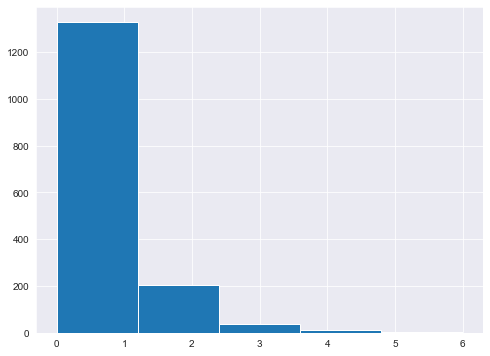

In [395]:
"""Let's plot a histogram for the number of ratings represented by the "rating_counts" column in the above dataframe. 
Execute the following script:"""

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=5)

From the output, you can see that most of the restaurantss have received less than 3 ratings. While the number of restaurantss having more than 4 ratings is very low.

In [396]:
#To create the matrix of restaurants titles and corresponding user ratings, execute the following script:

user_restaurants_rating = data_recom_rating.pivot_table(index='Id', columns='name', values='rate')
user_restaurants_rating.head()

name,#FeelTheROLL,1131 Bar + Kitchen,1441 Pizzeria,1522 - The Pub,1947,1Q1,2 Statez,20 Char - Sterlings MAC Hotel,20 Feet High,2nd Home Restaurant,...,Zaikedar Kitchen,Zangos Grill,Zeeshan,Zengi Pub & Restaurant,Ziyan's Cafe 27th,Zodiac - Fortune Select JP Cosmos Hotel,Zodiac Grills,b CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© - Shangri-La Hotel,eat.fit,i-Bar - The Park Bangalore
Id,,,,,,,,,,,,,,,,,,,,,
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We know that each column contains all the user ratings for a particular restaurant. Let's find all the user ratings for the  "Lassi shop" and find the restaurant similar to it. We chose this reataurant since it has the highest number of ratings and we want to find the correlation between Restaurant that have a higher number of ratings.

In [399]:
user_restaurants_rating=user_restaurants_rating.fillna(0)

__Let's execute the following script:To find the user ratings for "Lassi Shop", execute the following script:__

In [401]:
#To find the user ratings for "Lassi Shop", execute the following script:

Lassi_Shop_ratings = user_restaurants_rating['Lassi Shop']


Now let's retrieve all the restaurant that are similar to "Lassi shop".

In [404]:
restaurantss_like_Lassi_Shop = user_restaurants_rating.corrwith(Lassi_Shop_ratings)

corr_Lassi_Shop = pd.DataFrame(restaurantss_like_Lassi_Shop, columns=['Correlation'])
corr_Lassi_Shop.dropna(inplace=True)
corr_Lassi_Shop.head()

,Correlation
name,
#FeelTheROLL,-0.001189
1131 Bar + Kitchen,-0.001189
1441 Pizzeria,-0.001682
1522 - The Pub,-0.001189
1947,-0.001189


In [405]:
corr_Lassi_Shop.sort_values('Correlation', ascending=False).head()

,Correlation
name,
Lassi Shop,1.000000
Smoke House Deli,-0.001189
Food Box -The Taste Of Odisha,-0.001189
Yauatcha,-0.001189
Vishwaas Take Away,-0.001189


In [534]:
corr_Lassi_Shop = corr_Lassi_Shop.join(ratings_mean_count['rating_counts'])
corr_Lassi_Shop.head()

,Correlation,rating_counts
name,,
#FeelTheROLL,-0.001009,1
1131 Bar + Kitchen,-0.001009,1
1441 Pizzeria,-0.001428,2
1522 - The Pub,-0.001009,1
1947,-0.001009,1


### Recommend top 3 restaurant names based on the Rating parameters only 

In [540]:
corr_Lassi_Shop[corr_Lassi_Shop['rating_counts']>4].sort_values('Correlation', ascending=False).head()


,Correlation,rating_counts
name,,
McDonald's,-0.002248,5
Ramji Chaiwale,-0.002257,5
Apsara Ice Cream,-0.002472,6


- Now you can see from the output the restaurants that are highly correlated with "Lassi shop". The restaurants in the list are some of the most famous restaurants, and since "Lassi shop" is also a very famous restaurants(Outlet), there is a high chance that these restaurants are correlated.
- We have already seen that in EDA, Lassi shop is higher rated shop. Please check the **Top restaurant Analysis in the EDA section**

**Here's I Build a recommendation system, where user able to express what he wants according to their ratings basis and system will be recommended relevant restaurants**

*******************************************************************************************************

__I build the conversational bot (chatbot) for good Restaurant discovery experienceHere's,its similar to this problem__ 

__Here's my github link: https://github.com/deepakush/Building-a-Conversational-Chatbot-and-deploy-on-Slack
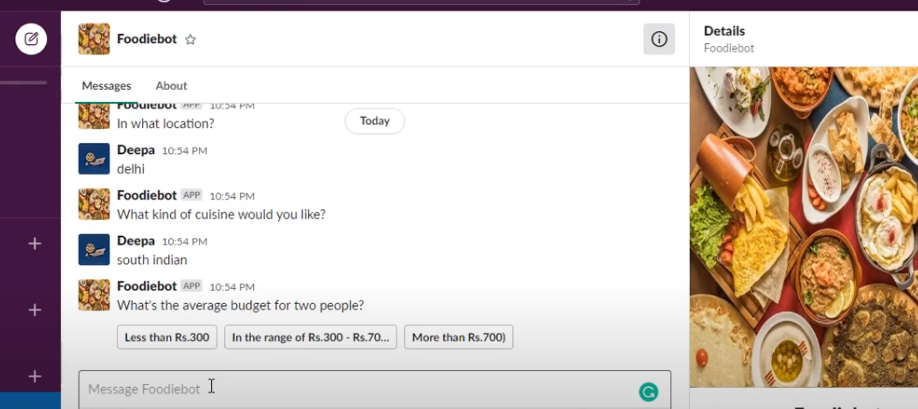__